Load the Original Dataset

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
data = pd.read_csv('UK_Accident.csv')  # Replace with your dataset filename
print("Dataset Loaded Successfully.")

Dataset Loaded Successfully.


In [9]:
data.head()  # Display first few rows

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [11]:
print(data.head())  # Display first few rows

   Unnamed: 0 Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  \
0           0  200501BS00001               525680.0                  178240   
1           1  200501BS00002               524170.0                  181650   
2           2  200501BS00003               524520.0                  182240   
3           3  200501BS00004               526900.0                  177530   
4           4  200501BS00005               528060.0                  179040   

   Longitude   Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  -0.191170  51.489096             1                  2                   1   
1  -0.211708  51.520075             1                  3                   1   
2  -0.206458  51.525301             1                  3                   2   
3  -0.173862  51.482442             1                  3                   1   
4  -0.156618  51.495752             1                  3                   1   

   Number_of_Casualties  ...      Pedestrian

In [13]:
data.columns

Index(['Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
       'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
       'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
       'Date', 'Day_of_Week', 'Time', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class', '1st_Road_Number',
       'Road_Type', 'Speed_limit', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1048575 non-null  int64  
 1   Accident_Index                               1048575 non-null  object 
 2   Location_Easting_OSGR                        1048474 non-null  float64
 3   Location_Northing_OSGR                       1048575 non-null  int64  
 4   Longitude                                    1048474 non-null  float64
 5   Latitude                                     1048575 non-null  float64
 6   Police_Force                                 1048575 non-null  int64  
 7   Accident_Severity                            1048575 non-null  int64  
 8   Number_of_Vehicles                           1048575 non-null  int64  
 9   Number_of_Casualties                         1

In [17]:
data.describe()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,1.048575e+06,1.048474e+06,1.048575e+06,1.048474e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.600532e+05,4.385782e+05,2.997915e+05,-1.451933e+00,5.258130e+01,3.072207e+01,2.841090e+00,1.832601e+00,1.356745e+00,4.123111e+00,3.530595e+02,4.092830e+00,1.004720e+03,3.927714e+01,2.633179e+00,3.804578e+02,1.358382e+00,2.007816e+03
std,1.553517e+05,9.551618e+04,1.613714e+05,1.404224e+00,1.541738e+00,2.559620e+01,4.007862e-01,7.164625e-01,8.253151e-01,1.927559e+00,2.599273e+02,1.433534e+00,1.825067e+03,1.424220e+01,3.209799e+00,1.304678e+03,4.797877e-01,2.179761e+00
min,0.000000e+00,6.495000e+04,0.000000e+00,-7.516225e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,1.000000e+01,-1.000000e+00,-1.000000e+00,1.000000e+00,2.005000e+03
25%,1.265105e+05,3.743625e+05,1.785815e+05,-2.385540e+00,5.149327e+01,7.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.140000e+02,3.000000e+00,0.000000e+00,3.000000e+01,-1.000000e+00,0.000000e+00,1.000000e+00,2.006000e+03
50%,2.575820e+05,4.387700e+05,2.689000e+05,-1.420841e+00,5.230943e+01,3.000000e+01,3.000000e+00,2.000000e+00,1.000000e+00,4.000000e+00,3.250000e+02,4.000000e+00,1.240000e+02,3.000000e+01,3.000000e+00,0.000000e+00,1.000000e+00,2.007000e+03
75%,3.886540e+05,5.227800e+05,3.972100e+05,-2.239450e-01,5.346987e+01,4.600000e+01,3.000000e+00,2.000000e+00,1.000000e+00,6.000000e+00,5.320000e+02,6.000000e+00,7.100000e+02,5.000000e+01,6.000000e+00,0.000000e+00,2.000000e+00,2.010000e+03
max,5.700100e+05,6.553700e+05,1.208800e+06,1.759398e+00,6.075754e+01,9.800000e+01,3.000000e+00,3.400000e+01,8.700000e+01,7.000000e+00,9.410000e+02,6.000000e+00,9.999000e+03,7.000000e+01,6.000000e+00,9.999000e+03,3.000000e+00,2.012000e+03


In [19]:
data.isnull().sum()

Unnamed: 0                                           0
Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                               0
Longitude                                          101
Latitude                                             0
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               104
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limi

In [21]:
data.dropna(inplace=True)

In [23]:
print(data.duplicated().sum())
data = data.drop_duplicates()

0


In [25]:
data = data[~data['Year'].isin([2005, 2006, 2007, 2008])]

In [27]:
columns_to_drop = [
    'Unnamed: 0', 'Accident_Index', 'Location_Easting_OSGR',
    'Location_Northing_OSGR', 'Longitude', 'Latitude', 'Police_Force',
    'Accident_Severity', 'Number_of_Casualties', 'Date', 'Day_of_Week',
    'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
    '1st_Road_Class', '1st_Road_Number', 'Junction_Control',
    '2nd_Road_Class', '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
    'Pedestrian_Crossing-Physical_Facilities', 'Special_Conditions_at_Site',
    'Carriageway_Hazards', 'Did_Police_Officer_Attend_Scene_of_Accident',
    'LSOA_of_Accident_Location'
]
data = data.drop(columns=columns_to_drop)

In [29]:
data.head()

,Number_of_Vehicles,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
570206,1,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,1,2009
572271,2,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,1,2009
572444,1,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2009
573756,1,Dual carriageway,30,Darkness: Street lights present and lit,Other,Wet/Damp,1,2009
574359,2,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,1,2009


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 570206 to 1047477
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Number_of_Vehicles       266 non-null    int64 
 1   Road_Type                266 non-null    object
 2   Speed_limit              266 non-null    int64 
 3   Light_Conditions         266 non-null    object
 4   Weather_Conditions       266 non-null    object
 5   Road_Surface_Conditions  266 non-null    object
 6   Urban_or_Rural_Area      266 non-null    int64 
 7   Year                     266 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 18.7+ KB


In [33]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 570206 to 1047477
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Number_of_Vehicles       266 non-null    int64 
 1   Road_Type                266 non-null    object
 2   Speed_limit              266 non-null    int64 
 3   Light_Conditions         266 non-null    object
 4   Weather_Conditions       266 non-null    object
 5   Road_Surface_Conditions  266 non-null    object
 6   Urban_or_Rural_Area      266 non-null    int64 
 7   Year                     266 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 18.7+ KB
None


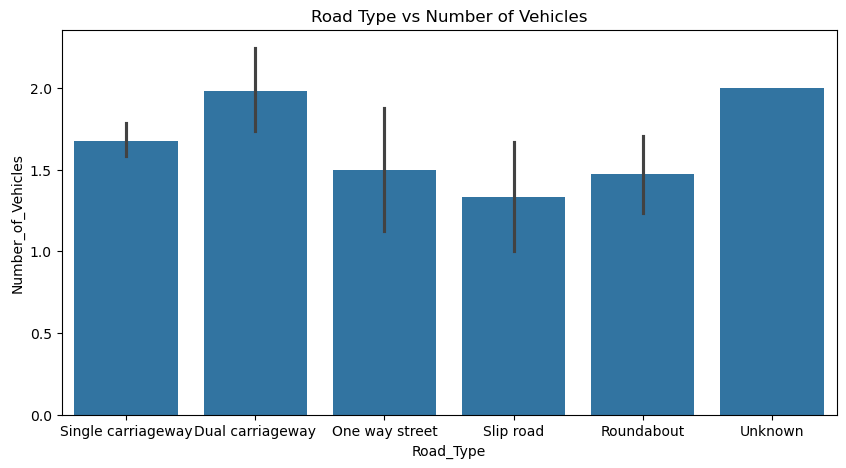

In [35]:
# Road Type vs. Number of Vehicles
plt.figure(figsize=(10, 5))
sns.barplot(x='Road_Type', y='Number_of_Vehicles', data=data)
plt.title("Road Type vs Number of Vehicles")
plt.show()

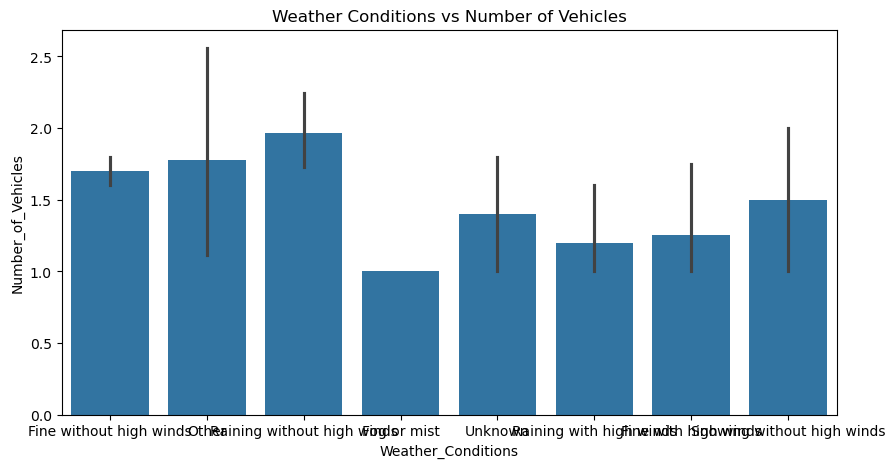

In [37]:
# Weather Condition vs. Number of Vehicles
plt.figure(figsize=(10, 5))
sns.barplot(x='Weather_Conditions', y='Number_of_Vehicles', data=data)
plt.title("Weather Conditions vs Number of Vehicles")
plt.show()

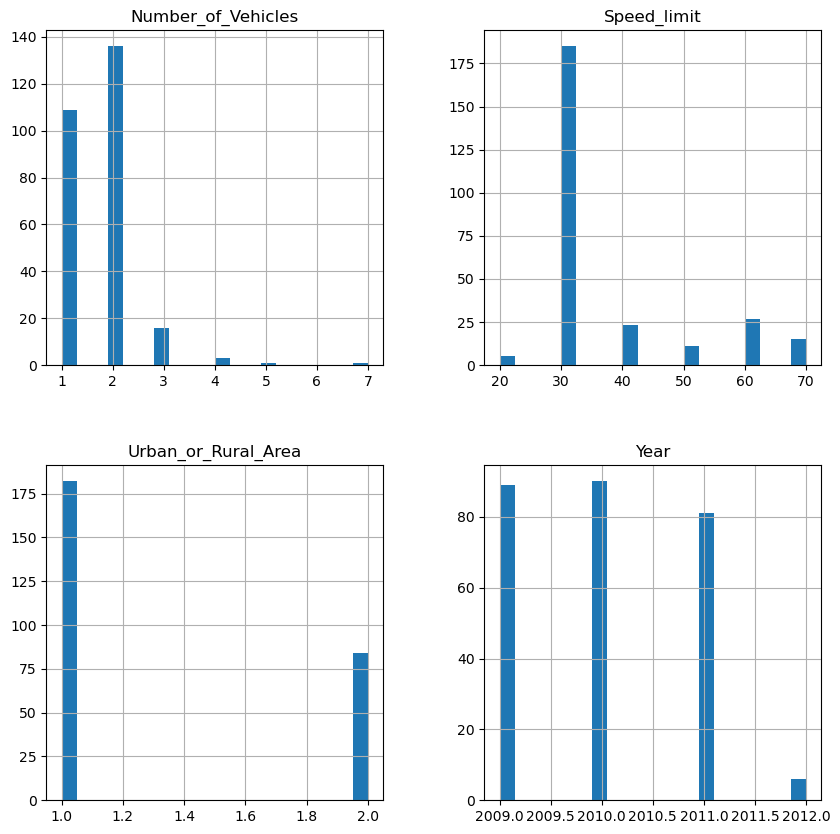

In [39]:
data.hist(bins=20, figsize=(10, 10))
plt.show()

In [41]:
print(data.dtypes)

Number_of_Vehicles          int64
Road_Type                  object
Speed_limit                 int64
Light_Conditions           object
Weather_Conditions         object
Road_Surface_Conditions    object
Urban_or_Rural_Area         int64
Year                        int64
dtype: object


In [43]:
numeric_data = data.select_dtypes(include=['number'])

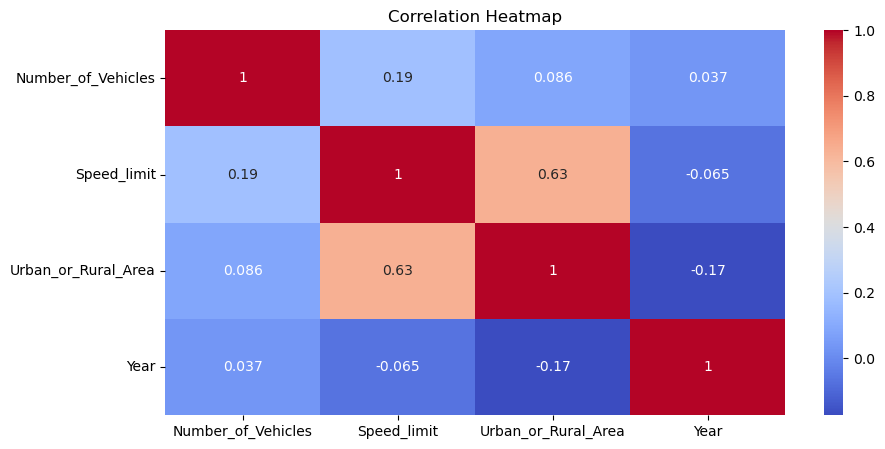

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [47]:
# Step 1: Filter numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Step 2: Handle missing values
numeric_data = numeric_data.fillna(0)  # Replace NaNs with 0 (or you can drop them using dropna)

# Step 3: Set a correlation threshold
correlation_threshold = 0.8

# Step 4: Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Step 5: Identify features with correlation above the threshold
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            col_i = correlation_matrix.columns[i]
            col_j = correlation_matrix.columns[j]
            high_corr_pairs.append((col_i, col_j))

print("Highly correlated pairs:", high_corr_pairs)

# Step 6: Drop one feature from each highly correlated pair
columns_to_drop = list(set(pair[0] for pair in high_corr_pairs))  # Use set to avoid duplicates
data_cleaned = data.drop(columns=columns_to_drop, axis=1)

# Step 7: Check remaining features
print("Remaining features after dropping highly correlated columns:")
print(data_cleaned.columns)


Highly correlated pairs: []
Remaining features after dropping highly correlated columns:
Index(['Number_of_Vehicles', 'Road_Type', 'Speed_limit', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Year'],
      dtype='object')


In [49]:
data.head()

,Number_of_Vehicles,Road_Type,Speed_limit,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
570206,1,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,1,2009
572271,2,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,1,2009
572444,1,Single carriageway,30,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2009
573756,1,Dual carriageway,30,Darkness: Street lights present and lit,Other,Wet/Damp,1,2009
574359,2,Single carriageway,30,Daylight: Street light present,Fine without high winds,Dry,1,2009


In [51]:
# Check the data types to identify numeric columns
print(data.dtypes)

# Select only the numeric columns (e.g., Number_of_Vehicles, Speed_limit)
data_numeric = data[['Number_of_Vehicles', 'Speed_limit', 'Year']]  # Adjust the columns as needed

# Add constant for intercept in the VIF calculation
from statsmodels.tools.tools import add_constant
subset_data_const = add_constant(data_numeric)

# Create an empty DataFrame to store VIF results
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()

# Store feature names in the "feature" column
vif_data["feature"] = subset_data_const.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(subset_data_const.values, i) 
                   for i in range(subset_data_const.shape[1])]



Number_of_Vehicles          int64
Road_Type                  object
Speed_limit                 int64
Light_Conditions           object
Weather_Conditions         object
Road_Surface_Conditions    object
Urban_or_Rural_Area         int64
Year                        int64
dtype: object


In [53]:
# Print the VIF data
print(vif_data)

              feature           VIF
0               const  5.578770e+06
1  Number_of_Vehicles  1.038077e+00
2         Speed_limit  1.041045e+00
3                Year  1.006672e+00


In [55]:
# Drop columns with high VIF
columns_to_drop = ['Speed_limit']  # Example: replace based on your VIF results
data_numeric = data_numeric.drop(columns=columns_to_drop, axis=1)

# Verify remaining columns
print(data_numeric.head())

        Number_of_Vehicles  Year
570206                   1  2009
572271                   2  2009
572444                   1  2009
573756                   1  2009
574359                   2  2009


In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_numeric_scaled = pd.DataFrame(scaler.fit_transform(data_numeric), columns=data_numeric.columns)

# Check scaled data
print(data_numeric_scaled.head())

   Number_of_Vehicles      Year
0           -0.943951 -1.188747
1            0.398781 -1.188747
2           -0.943951 -1.188747
3           -0.943951 -1.188747
4            0.398781 -1.188747


In [59]:
print(data.columns)

Index(['Number_of_Vehicles', 'Road_Type', 'Speed_limit', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Year'],
      dtype='object')


In [61]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = data_numeric_scaled  # Ensure this variable is correctly defined and scaled
y = data['Urban_or_Rural_Area']  # Replace with your target column

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Confirm split
print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Training Set: (186, 2), Testing Set: (80, 2)


In [63]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
logistic_model = LogisticRegression(random_state=42)

# Train the model
logistic_model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


In [65]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7375
Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.98      0.84        57
           2       0.75      0.13      0.22        23

    accuracy                           0.74        80
   macro avg       0.74      0.56      0.53        80
weighted avg       0.74      0.74      0.66        80



In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve

# Train RandomForest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = rf_model.score(X_test, y_test)
print(f"Random Forest Accuracy: {rf_accuracy}")

# Train SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = svm_model.score(X_test, y_test)
print(f"SVM Accuracy: {svm_accuracy}")

# Compare ROC-AUC
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
svm_roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])

print(f"Random Forest ROC-AUC: {rf_roc_auc}")
print(f"SVM ROC-AUC: {svm_roc_auc}")

Random Forest Accuracy: 0.7375
SVM Accuracy: 0.7375
Random Forest ROC-AUC: 0.5846681922196797
SVM ROC-AUC: 0.6845919145690312


In [69]:
import pickle

# Save the model
with open("rf_model_p_pickle.pkl", "wb") as f:
    pickle.dump(rf_model, f)
print("Model saved successfully using pickle.")

# Load the model
with open("rf_model_p_pickle.pkl", "rb") as f:
    loaded_model = pickle.load(f)
print("Model loaded successfully.")

Model saved successfully using pickle.
Model loaded successfully.


In [77]:
print(loaded_model.feature_names_in_)

['Number_of_Vehicles' 'Year']


In [ ]:
import sklearn
import joblib

print(f"scikit-learn version: {sklearn.__version__}")
print(f"joblib version: {joblib.__version__}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
import joblib

# Train RandomForest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = rf_model.score(X_test, y_test)
print(f"Random Forest Accuracy: {rf_accuracy}")

# Train SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = svm_model.score(X_test, y_test)
print(f"SVM Accuracy: {svm_accuracy}")

# Compare ROC-AUC
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
svm_roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])

print(f"Random Forest ROC-AUC: {rf_roc_auc}")
print(f"SVM ROC-AUC: {svm_roc_auc}")

# Decide which model to save (for example, Random Forest)
best_model = rf_model  # Replace with svm_model if SVM is better

# Save the best model
filename = "best_model.pkl"
joblib.dump(best_model, filename)
print(f"Best model saved successfully as {filename}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
import joblib

# Train RandomForest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = rf_model.score(X_test, y_test)
print(f"Random Forest Accuracy: {rf_accuracy}")

# Train SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = svm_model.score(X_test, y_test)
print(f"SVM Accuracy: {svm_accuracy}")

# Compare ROC-AUC
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
svm_roc_auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])

print(f"Random Forest ROC-AUC: {rf_roc_auc}")
print(f"SVM ROC-AUC: {svm_roc_auc}")

# Decide which model to save (for example, Random Forest)
best_model = rf_model  # Replace with svm_model if SVM is better

# Save the best model
filename = "best_model.pkl"
joblib.dump(best_model, filename)
print(f"Best model saved successfully as {filename}")

In [ ]:
import joblib

# Load the model
loaded_model = joblib.load("best_model.pkl")
print("Model loaded successfully.")

# Use the model for prediction
sample_data = X_test[:5]  # Replace with your test data
predictions = loaded_model.predict(sample_data)
print("Predictions:", predictions)

In [ ]:
print("Random Forest Model Parameters:")
print(rf_model.get_params())

In [ ]:
import joblib

# Save the model
try:
    joblib.dump(rf_model, "rf_model_test.pkl")
    print("Model saved successfully.")
except Exception as e:
    print(f"Error occurred while saving the model: {e}")